# **Airline Passenger Satisfaction Analysis Using Machine Learning**

Developed by : LAKSHMI RAJ

# **INTRODUCTION**

Customer satisfaction plays a pivotal role in the airline industry as it directly influences customer loyalty, brand reputation, and revenue. With the growing competition among airlines, understanding the key factors affecting passenger satisfaction is vital for service improvement and decision-making.

This project uses data science and machine learning techniques to predict airline customer satisfaction using real-world passenger feedback data. By identifying patterns in passenger satisfaction, airlines can optimize their operations, enhance the customer experience, and gain a competitive edge in the industry.

# **GOAL OF THE PROJECT**

The primary objective of this project is to build an efficient machine learning pipeline to predict airline customer satisfaction. The output will categorize passengers as either "Satisfied" or "Neutral or Dissatisfied." Performance will be evaluated using various metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

# **OVERVIEW OF THE PROJECT**

This project involves the following steps:

**Dataset Preprocessing:**
* Handle missing values using median imputation.
* Remove outliers using the Interquartile Range (IQR) method.
* Ensure proper data types for categorical and numerical columns.
* Check for duplicate entries and clean the dataset.

**Exploratory Data Analysis (EDA):**
* Visualize the distribution of the target variable.
* Analyze correlations among features.
* Generate visual insights on features like Age, Flight Distance, Travel Class, and In-flight WiFi Service.

**Addressing Class Imbalance:**
* Check for imbalanced data in the target variable.
* Apply Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset.

**Feature Selection:**
* Use SelectKBest with mutual information to identify the top features influencing passenger satisfaction.

**Data Splitting and Preprocessing:**
* Split the dataset into training and testing sets.
* Apply scaling to numerical features and one-hot encoding to categorical features.

**Model Training:**
* Train multiple machine learning models: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gradient Boosting.
* Evaluate each model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
* Plot confusion matrices and ROC curves for each model.

**Hyperparameter Tuning:**
* Use GridSearchCV to optimize hyperparameters for all models.

**Selecting the Best Model:**
* Identify the best-performing model based on weighted average of all evaluation metrics.
* Display the best model along with its evaluation metrics.

**Saving the Model:**
* Save the best model as a pipeline for future predictions.

# **DATA STORY**

[Airline Passenger Satisfaction Dataset](https://drive.google.com/file/d/1VtYC86HrBZNrX3-4E-wtQ6ntz469A0IF/view?usp=sharing)

The dataset is sourced from Maven Analytics which represents real-world data collected from airline passengers. The information has been aggregated from passenger surveys and feedback forms administered by airlines to understand customer satisfaction better.

The dataset contains real-world feedback from airline passengers, offering a comprehensive view of customer satisfaction levels and factors influencing them. It provides information about demographic details, flight characteristics, and in-flight service ratings. The data structure includes:
* Demographics: Gender, Age
* Flight Details: Customer Type, Type of Travel, Class, Flight Distance, Departure Delay, Arrival Delay
* Service Ratings: In-flight WiFi Service, Gate Location, Food and Drink, Cleanliness, etc.
* Target Variable: Satisfaction (Satisfied or Neutral/Dissatisfied)








# **Import Necessary Libraries**

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
import joblib
import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# **Data Preparation**

**Load the dataset**

In [2]:
# Load the dataset
data = pd.read_csv('/content/airline_passenger_satisfaction.csv')

 **Initial Data Exploration**

In [3]:
# Step 2: Initial Exploration
def initial_exploration(data):
    print("\n--- Dataset Overview ---\n")
    print(data.shape)
    print("\n--- Data Information ---\n")
    print(data.info())
    print("\n--- Data Description ---\n")
    print(data.describe())
    print("\n--- Checking for Null Values ---\n")
    print(data.isnull().sum())
    print("\n--- Checking for Duplicate Values ---\n")
    print(data.duplicated().sum())

initial_exploration(data)


--- Dataset Overview ---

(129880, 24)

--- Data Information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 

In [4]:
# Displaying dataset
data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


**Checking and Ensuring correct Data types**

In [5]:
# Check and ensure correct data types
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in categorical_columns:
    data[col] = data[col].astype(str)

numerical_columns = [col for col in data.columns if col not in categorical_columns + ['Satisfaction', 'ID']]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

**Handling Missing values**

In [6]:
# Step 3: Handling Missing Values
print("\n--- Missing Values Summary Before Imputation ---\n")
print(data.isnull().sum())

# Impute missing values in numerical columns with median
num_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

print("\n--- Missing Values Summary after Imputation ---\n")
print(data.isnull().sum())


--- Missing Values Summary Before Imputation ---

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service       

**Outlier Removal using IQR method**

In [7]:
# Step 4: Outlier Removal using IQR Method
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

data = remove_outliers_iqr(data, numerical_columns)

# Print dataset after outlier removal
print("\n--- Dataset After Outlier Removal ---\n")
print(data.head())



--- Dataset After Outlier Removal ---

   ID  Gender   Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male  48.0    First-time       Business  Business            821.0   
2   3    Male  41.0     Returning       Business  Business            853.0   
3   4    Male  50.0     Returning       Business  Business           1905.0   
4   5  Female  49.0     Returning       Business  Business           3470.0   
6   7    Male  43.0     Returning       Business  Business           1963.0   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0              2.0            5.0                                     3.0   
2              0.0            0.0                                     4.0   
3              0.0            0.0                                     2.0   
4              0.0            1.0                                     3.0   
6              0.0            0.0                                     3.0   

   ...  On-board Servi

In [8]:
# checking shape after outlier removal
print("Shape of dataset after Outlier Removal:")
data.shape

Shape of dataset after Outlier Removal:


(74621, 24)

# **Exploratory Data Analysis**

**Distribution of target variable**

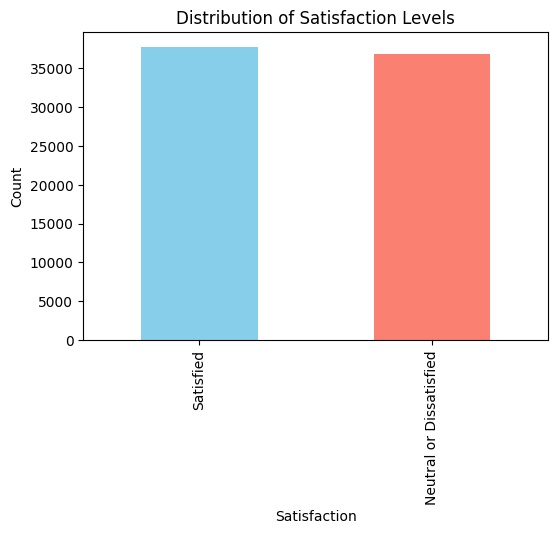

In [9]:
# Step 5: Exploratory Data Analysis
# Distribution of target variable
plt.figure(figsize=(6, 4))
data['Satisfaction'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Satisfaction Levels")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

**Visualizing Correlations**

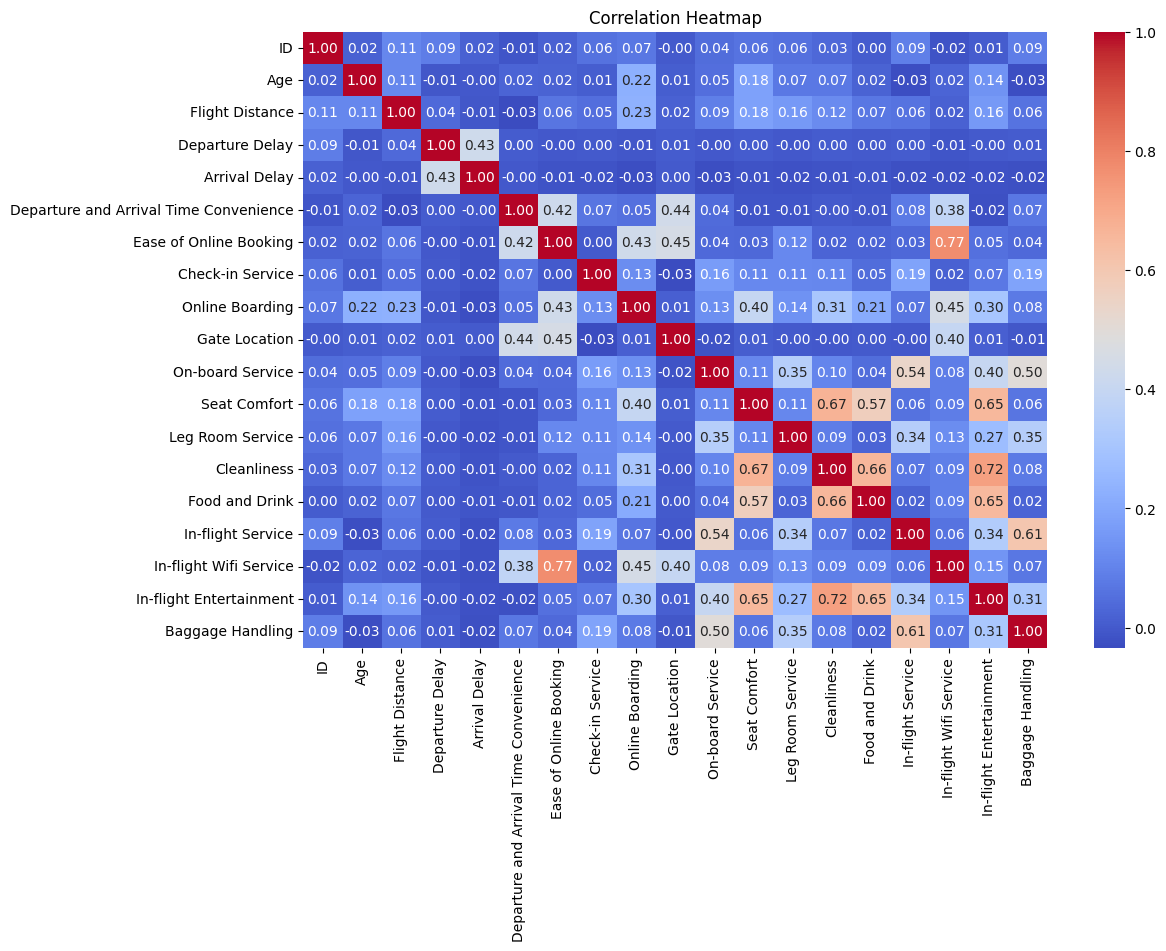

In [10]:
# Visualizing correlations
plt.figure(figsize=(12, 8))
numeric = data.select_dtypes(include=[np.number])
correlation_matrix = numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Age distribution by satisfaction**

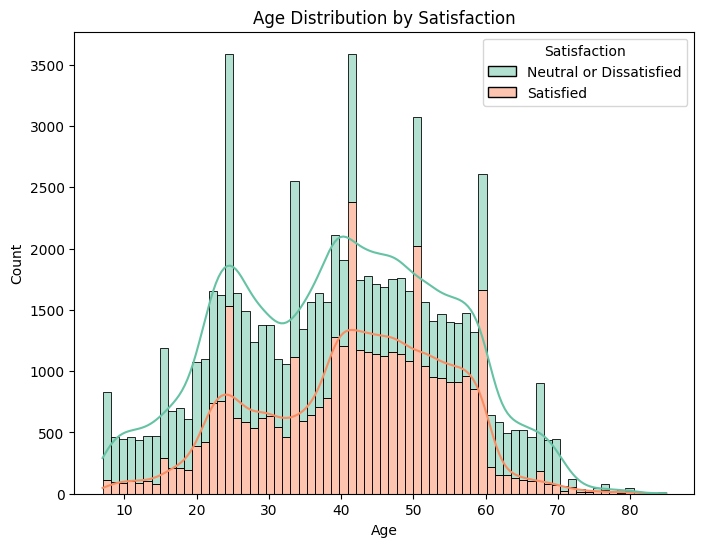

In [11]:
# Age distribution by satisfaction
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Satisfaction', multiple='stack', palette='Set2', kde=True)
plt.title("Age Distribution by Satisfaction")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Satisfaction by Class**

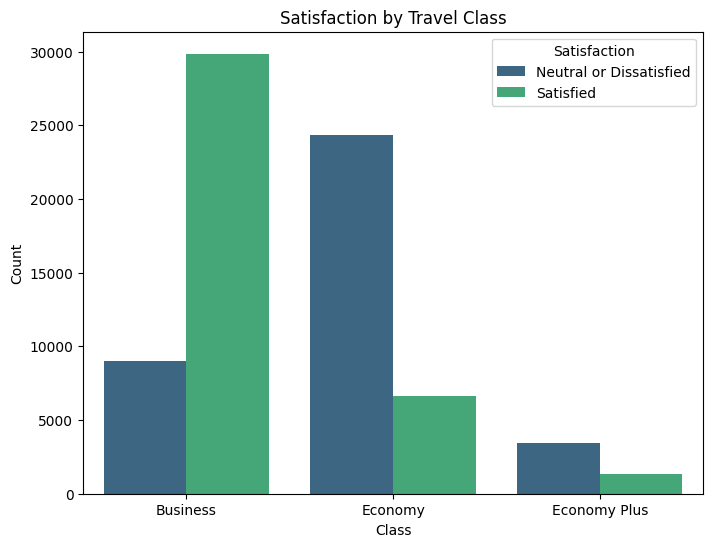

In [12]:
# Satisfaction by Class
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class', hue='Satisfaction', palette='viridis')
plt.title("Satisfaction by Travel Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


**Satisfaction by In-flight WiFi Service**

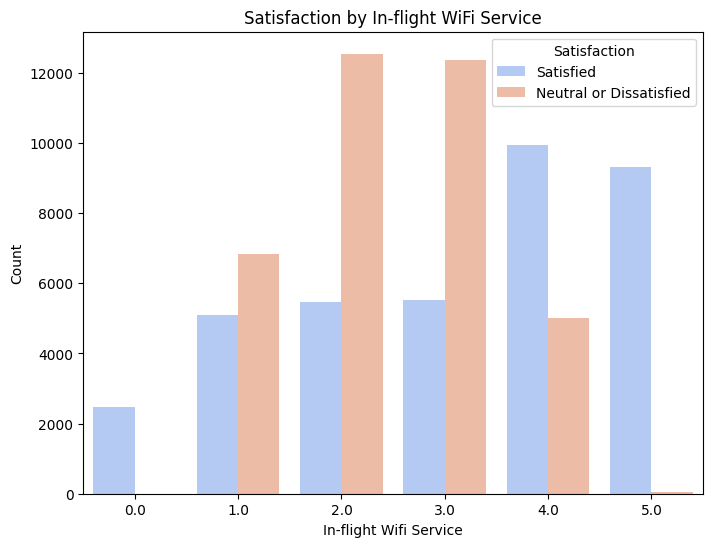

In [13]:
# Satisfaction by In-flight WiFi Service
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='In-flight Wifi Service', hue='Satisfaction', palette='coolwarm')
plt.title("Satisfaction by In-flight WiFi Service")
plt.xlabel("In-flight Wifi Service")
plt.ylabel("Count")
plt.show()

**IMBALANCED DATASET CHECK AND ENCODING**

In [14]:
# Step 6: Imbalanced Dataset Check
print("\n--- Target Variable Distribution ---\n")
print(data['Satisfaction'].value_counts(normalize=True))

# If dataset is imbalanced, apply SMOTE
y = data['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)  # Binary encoding of target
X = data.drop(columns=['Satisfaction', 'ID'])

categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Encoding categorical variables
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

X_encoded = preprocessor.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)


--- Target Variable Distribution ---

Satisfaction
Satisfied                  0.506386
Neutral or Dissatisfied    0.493614
Name: proportion, dtype: float64


**Feature Selection with SelectKBest**

In [15]:
# Step 7: Feature Selection with SelectKBest
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = kbest_selector.fit_transform(X_resampled, y_resampled)
selected_features = kbest_selector.get_support()
selected_feature_names = np.array(preprocessor.get_feature_names_out())[selected_features]

print("\n--- Selected Features ---\n")
print(selected_feature_names)



--- Selected Features ---

['num__Flight Distance' 'num__Online Boarding' 'num__Seat Comfort'
 'num__Leg Room Service' 'num__In-flight Wifi Service'
 'num__In-flight Entertainment' 'cat__Type of Travel_Business'
 'cat__Type of Travel_Personal' 'cat__Class_Business' 'cat__Class_Economy']


# **Feature and Label Preparation**

In [16]:
# Step 8: Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)


# **Model Training and Initial Evaluation with Pipeline**


--- Logistic Regression Performance ---

Training Accuracy: 0.8493689938636101
Testing Accuracy: 0.8467085676480317
Precision: 0.8446537543114885
Recall: 0.8474643950485825
F1 Score: 0.8460567404159192
ROC AUC: 0.9154368068425324
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      7602
           1       0.84      0.85      0.85      7513

    accuracy                           0.85     15115
   macro avg       0.85      0.85      0.85     15115
weighted avg       0.85      0.85      0.85     15115



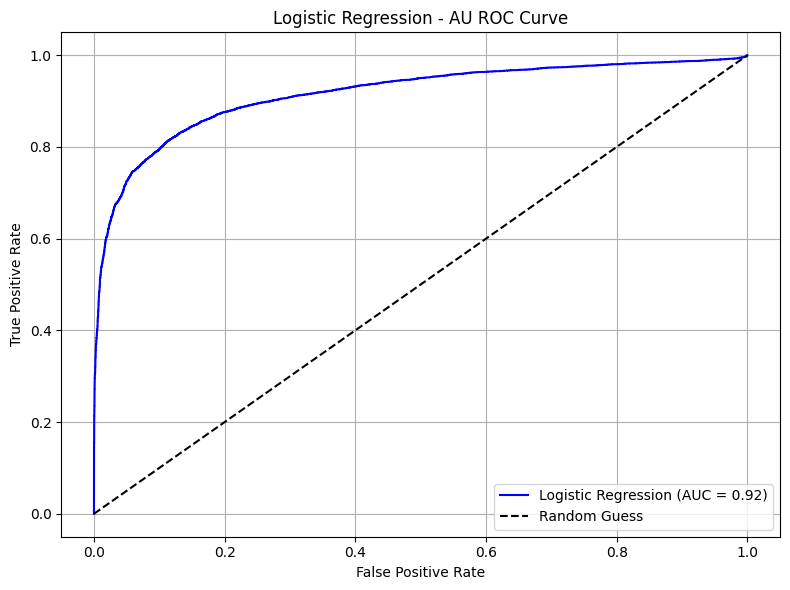

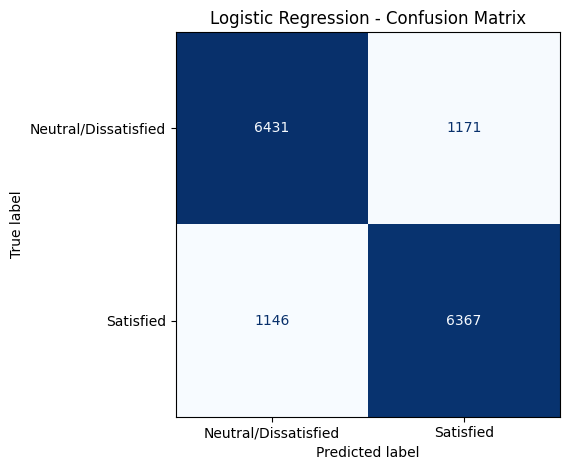


--- Decision Tree Performance ---

Training Accuracy: 0.9966754329380241
Testing Accuracy: 0.9082368508104532
Precision: 0.910920311242286
Recall: 0.9037668042060428
F1 Score: 0.9073294581412441
ROC AUC: 0.909332269212712
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7602
           1       0.91      0.90      0.91      7513

    accuracy                           0.91     15115
   macro avg       0.91      0.91      0.91     15115
weighted avg       0.91      0.91      0.91     15115



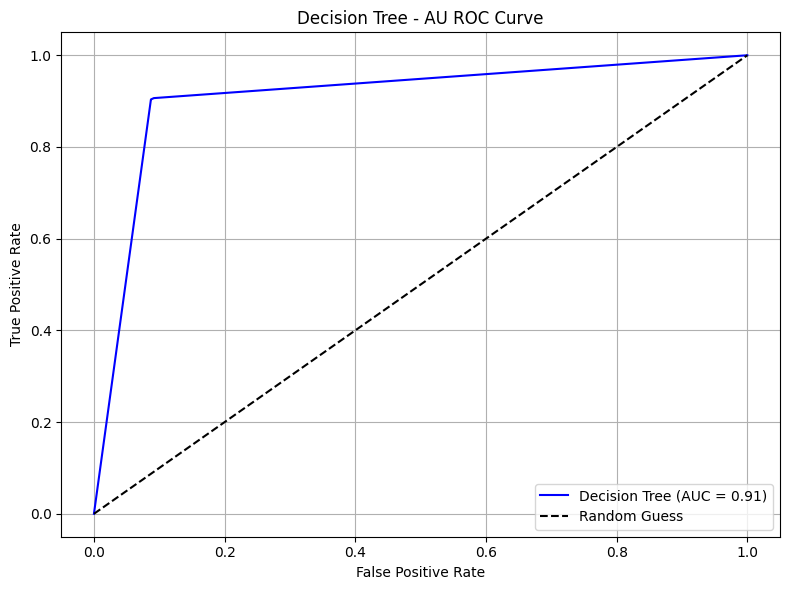

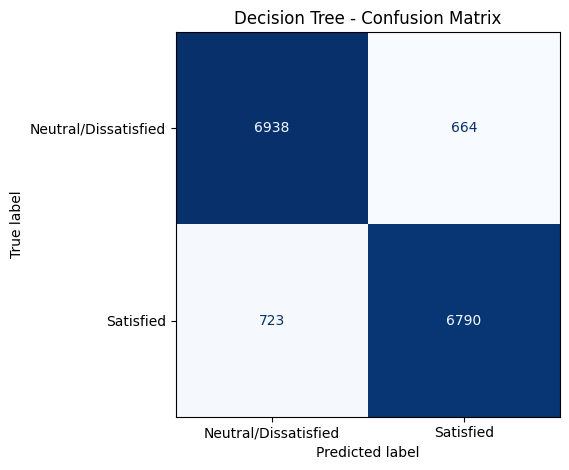


--- Random Forest Performance ---

Training Accuracy: 0.996625812534114
Testing Accuracy: 0.9196824346675488
Precision: 0.9270508474576271
Recall: 0.9100226274457607
F1 Score: 0.9184578183772165
ROC AUC: 0.9757714007813099
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      7602
           1       0.93      0.91      0.92      7513

    accuracy                           0.92     15115
   macro avg       0.92      0.92      0.92     15115
weighted avg       0.92      0.92      0.92     15115



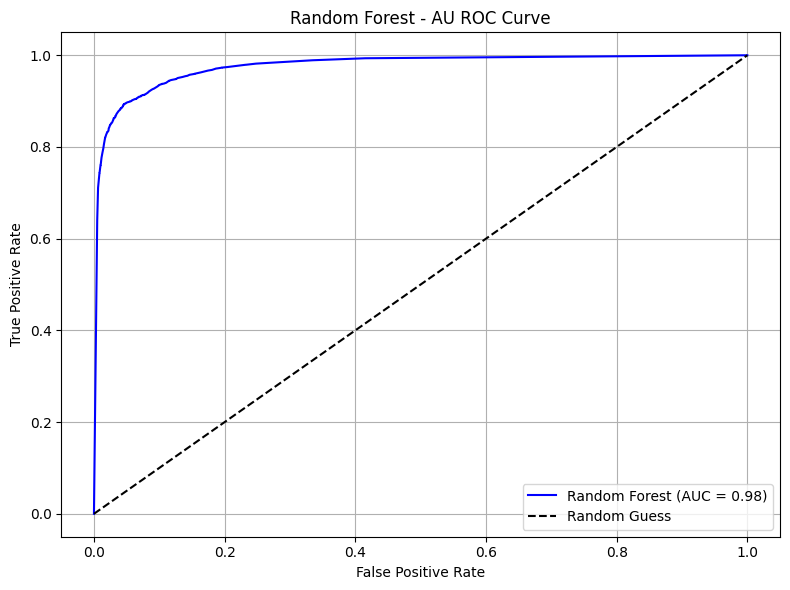

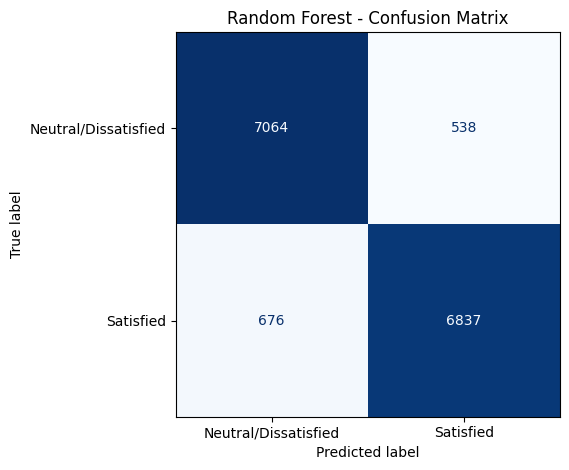


--- SVM Performance ---

Training Accuracy: 0.9316892439504457
Testing Accuracy: 0.9235196824346675
Precision: 0.93005006088486
Recall: 0.9149474244642619
F1 Score: 0.9224369296833065
ROC AUC: 0.9769570593992425
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      7602
           1       0.93      0.91      0.92      7513

    accuracy                           0.92     15115
   macro avg       0.92      0.92      0.92     15115
weighted avg       0.92      0.92      0.92     15115



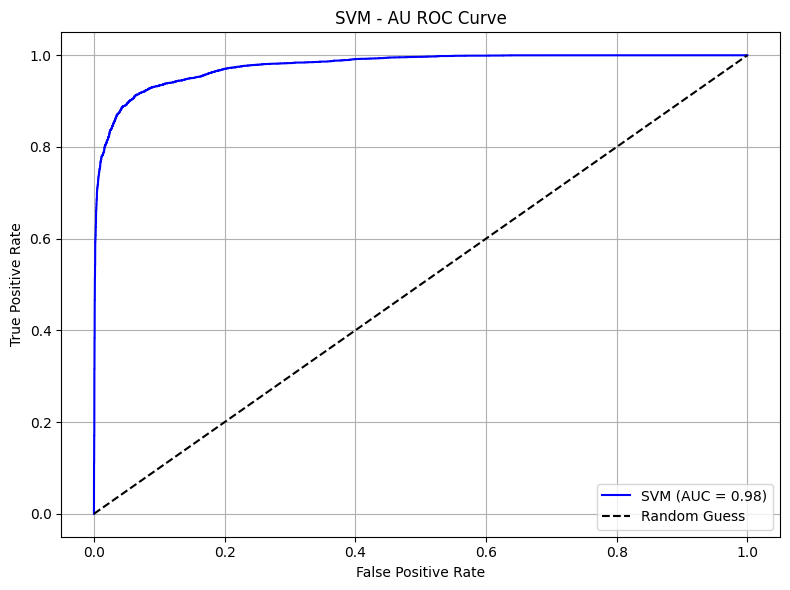

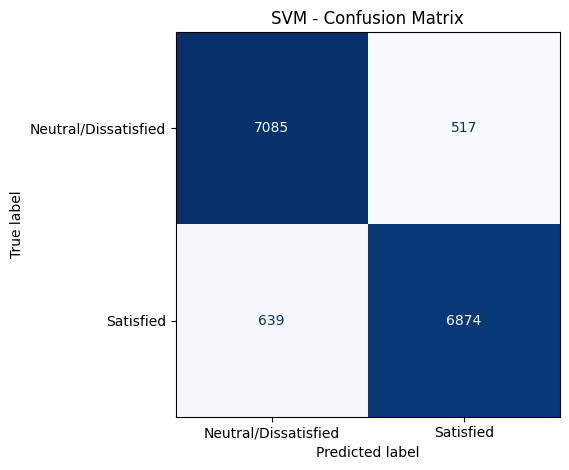


--- Gradient Boosting Performance ---

Training Accuracy: 0.9291916836203047
Testing Accuracy: 0.9214687396625868
Precision: 0.9306917211328976
Recall: 0.9097564222015174
F1 Score: 0.9201050010096251
ROC AUC: 0.978013108419667
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      7602
           1       0.93      0.91      0.92      7513

    accuracy                           0.92     15115
   macro avg       0.92      0.92      0.92     15115
weighted avg       0.92      0.92      0.92     15115



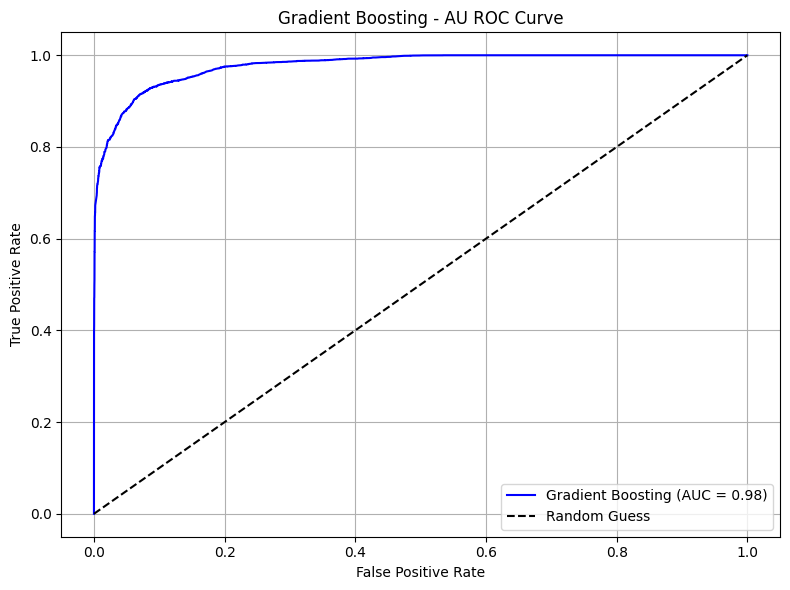

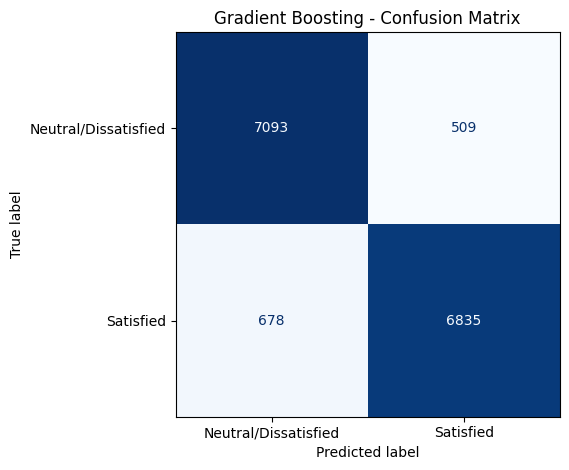

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
metrics_summary = []
roc_data = []  # To store ROC curve data for comparison later

for model_name, model in models.items():
    pipeline = Pipeline([
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None

    # Model Evaluation Metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    metrics_summary.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    print(f"\n--- {model_name} Performance ---\n")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc if roc_auc else "Not Available")
    print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))

    # Plot ROC Curve
    if roc_auc:
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
        plt.title(f"{model_name} - AU ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc='lower right')
        plt.grid()
        plt.tight_layout()
        plt.show()


    # Plot Confusion Matrix
    print("\n\n")
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                                   display_labels=['Neutral/Dissatisfied', 'Satisfied'],
                                                   cmap='Blues', colorbar=False)
    disp.ax_.set_title(f"{model_name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()




# **Hyperparameter Tuning and Final Evaluation of all models**


--- Hyperparameter Tuning for Logistic Regression ---
Best Parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}

--- Hyperparameter Tuning for Decision Tree ---
Best Parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

--- Hyperparameter Tuning for Random Forest ---
Best Parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}

--- Hyperparameter Tuning for SVM ---
Best Parameters for SVM: {'classifier__C': 10, 'classifier__kernel': 'rbf'}

--- Hyperparameter Tuning for Gradient Boosting ---
Best Parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}

--- Logistic Regression Tuned Performance ---
Accuracy: 0.8471
Precision: 0.8448
Recall: 0.8483
F1 Score: 0.8465
ROC AUC: 0.9153


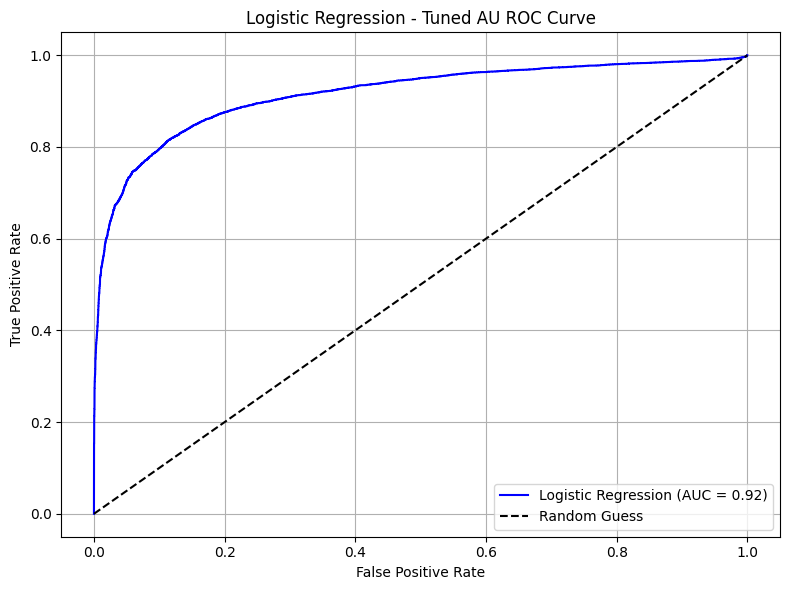

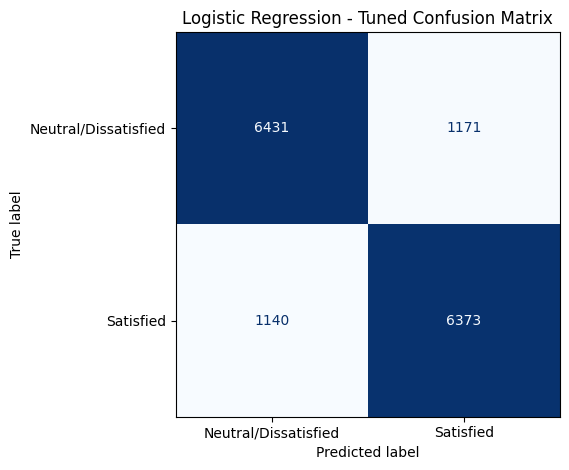


--- Decision Tree Tuned Performance ---
Accuracy: 0.9276
Precision: 0.9391
Recall: 0.9135
F1 Score: 0.9261
ROC AUC: 0.9779


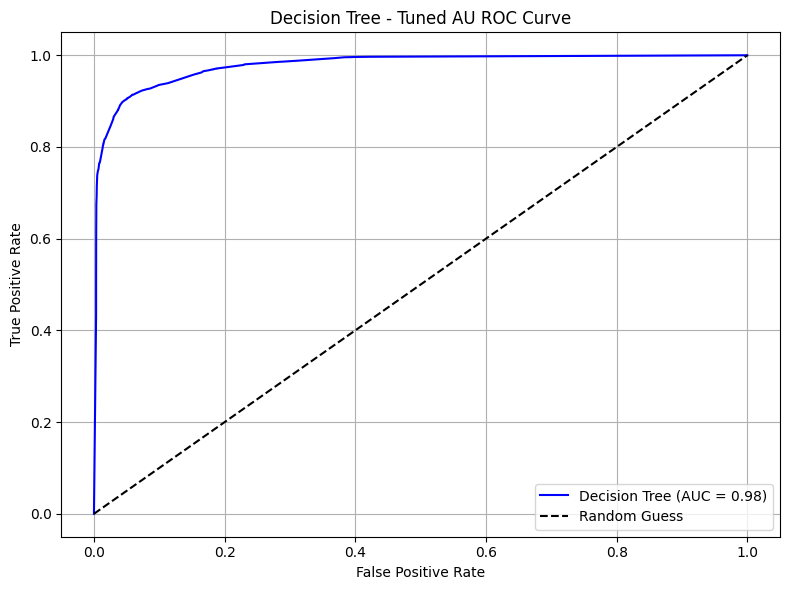

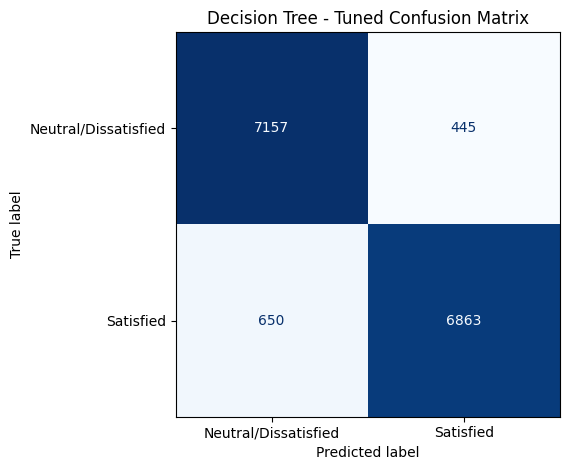


--- Random Forest Tuned Performance ---
Accuracy: 0.9325
Precision: 0.9463
Recall: 0.9163
F1 Score: 0.9310
ROC AUC: 0.9836


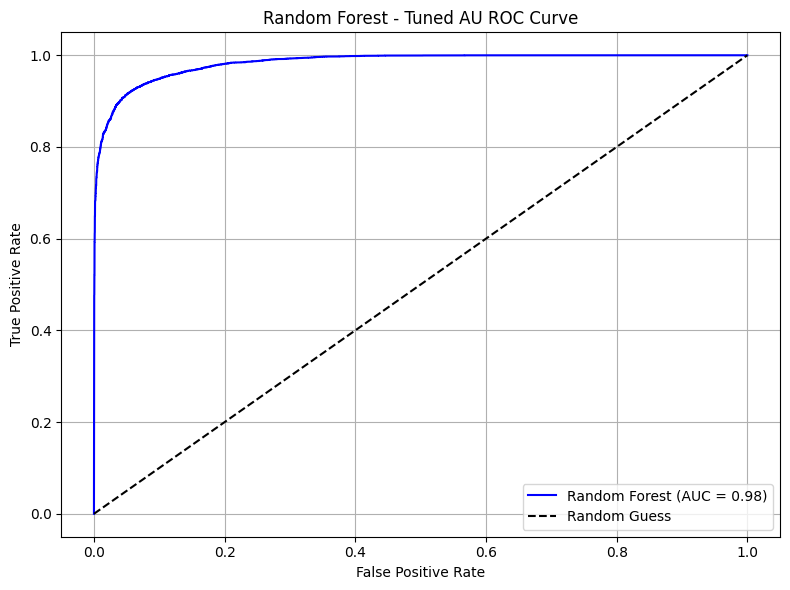

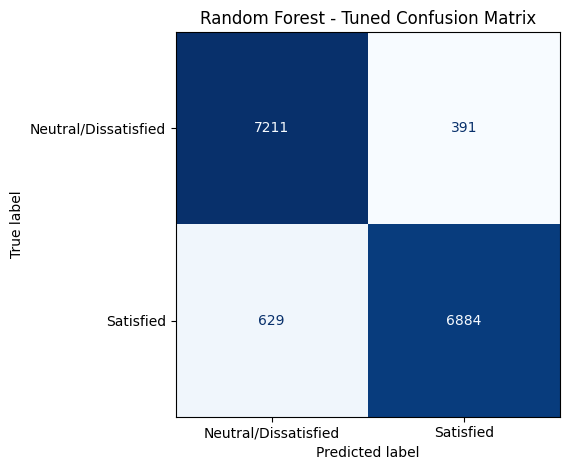


--- SVM Tuned Performance ---
Accuracy: 0.9275
Precision: 0.9402
Recall: 0.9122
F1 Score: 0.9260
ROC AUC: 0.9802


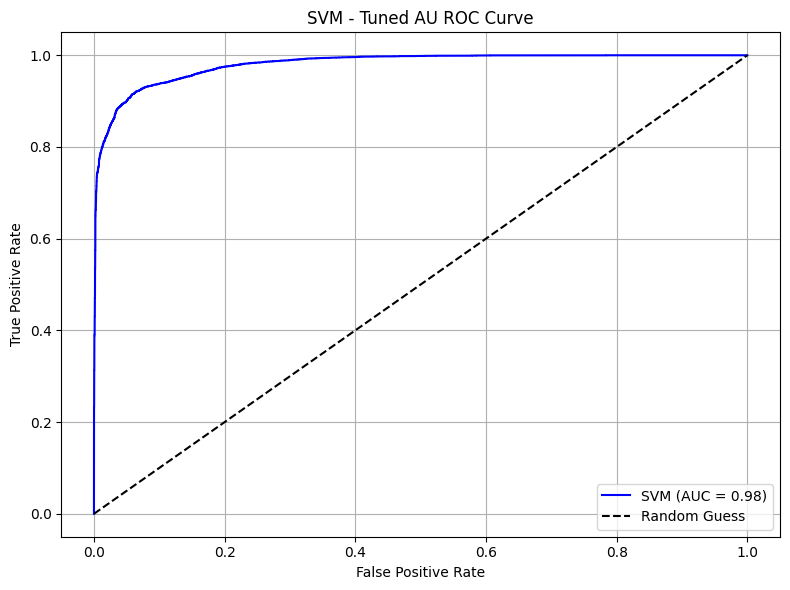

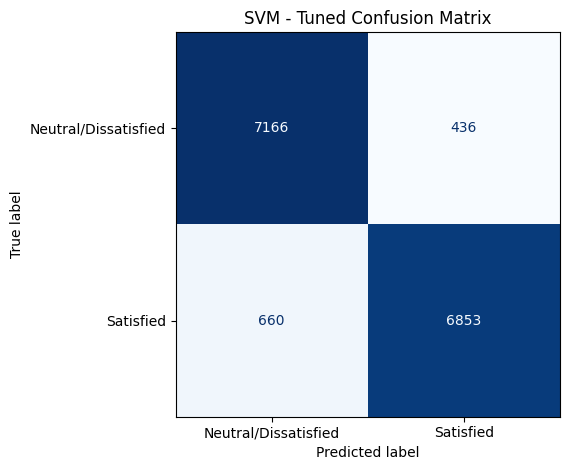


--- Gradient Boosting Tuned Performance ---
Accuracy: 0.9315
Precision: 0.9442
Recall: 0.9164
F1 Score: 0.9301
ROC AUC: 0.9838


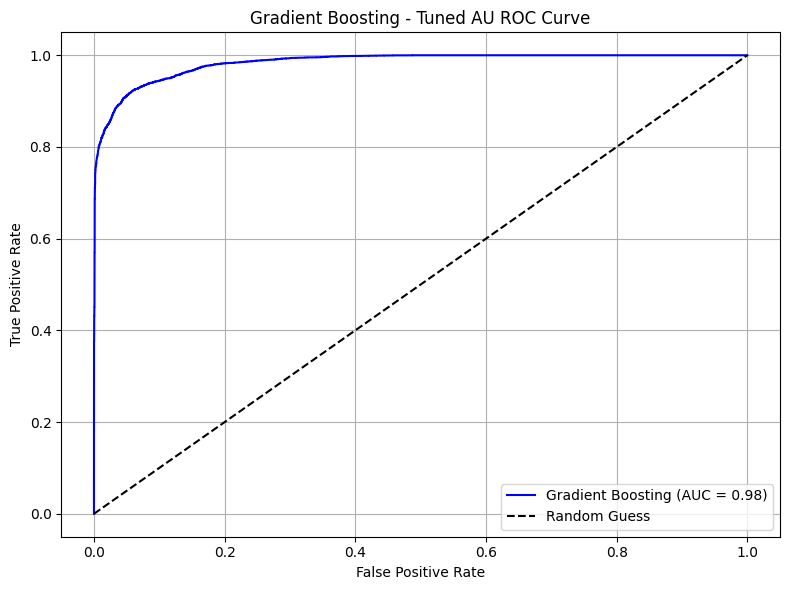

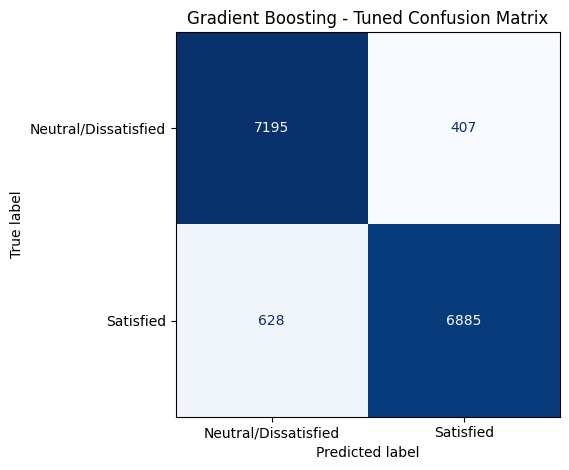

In [18]:
# Step 10: Hyperparameter Tuning for All Models
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    'Decision Tree': {
        'classifier__max_depth': [5, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 10]
    }
}

best_models = {}
for model_name, model in models.items():
    print(f"\n--- Hyperparameter Tuning for {model_name} ---")
    param_grid = param_grids[model_name]

    pipeline = Pipeline([
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

# Evaluate all tuned models on the test set
tuned_metrics_summary = []
tuned_roc_data = []  # To store ROC curve data for comparison later

for model_name, best_model in best_models.items():
    y_pred_test = best_model.predict(X_test)
    y_pred_proba_test = (
        best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    )

    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba_test) if y_pred_proba_test is not None else None

    tuned_metrics_summary.append({
        'Model': model_name,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    print(f"\n--- {model_name} Tuned Performance ---")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}" if roc_auc else "ROC AUC: Not Available")

    # Plot AU ROC Curve
    if roc_auc:
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
        plt.title(f"{model_name} - Tuned AU ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc='lower right')
        plt.grid()
        plt.tight_layout()
        plt.show()

        # Store ROC data for comparison
        tuned_roc_data.append((fpr, tpr, model_name, roc_auc))

    # Plot Confusion Matrix
    print("\n")
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_test, display_labels=['Neutral/Dissatisfied', 'Satisfied'], cmap='Blues', colorbar=False
    )
    disp.ax_.set_title(f"{model_name} - Tuned Confusion Matrix")
    plt.tight_layout()
    plt.show()



# **Selecting and Saving Best Model**

**Displaying and Visualizing metrics summary for all tuned models**


--- Tuned Metrics Summary for All Models ---
                 Model  Test Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression       0.847106   0.844777  0.848263  0.846517  0.915320
1        Decision Tree       0.927555   0.939108  0.913483  0.926118  0.977909
2        Random Forest       0.932517   0.946254  0.916278  0.931025  0.983639
3                  SVM       0.927489   0.940184  0.912152  0.925956  0.980185
4    Gradient Boosting       0.931525   0.944185  0.916412  0.930091  0.983772


<Figure size 1000x600 with 0 Axes>

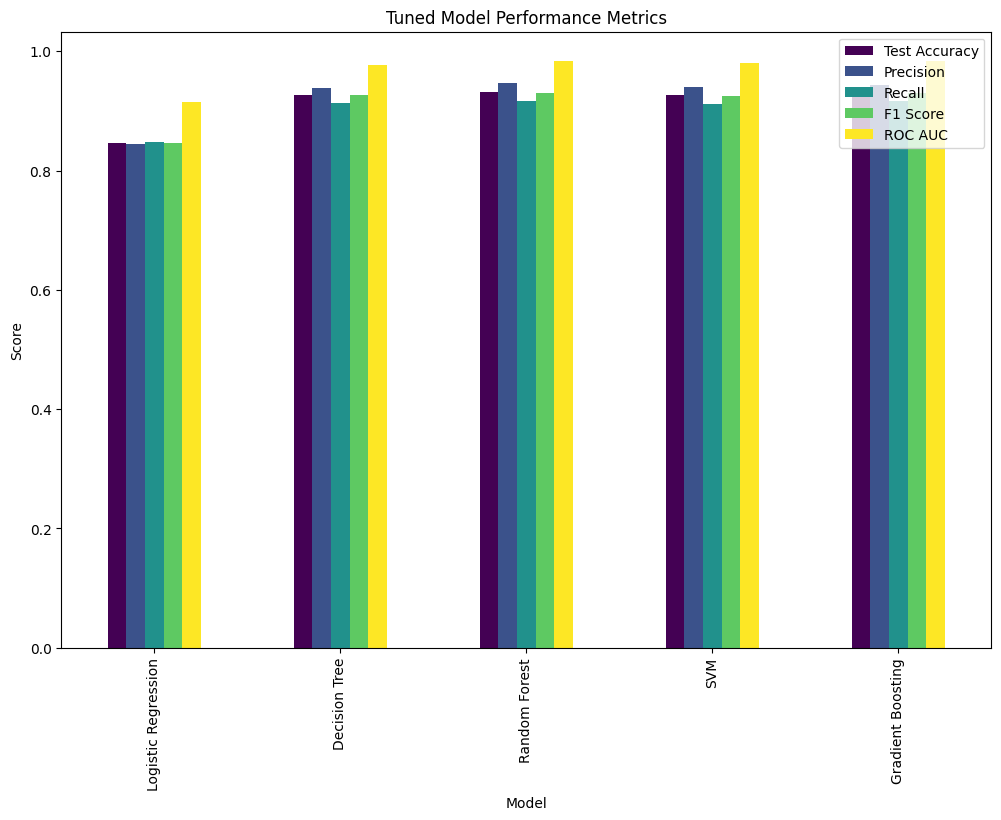

In [19]:
# Display metrics summary for all tuned models
tuned_metrics_df = pd.DataFrame(tuned_metrics_summary)
print("\n--- Tuned Metrics Summary for All Models ---")
print(tuned_metrics_df)

# Visualize metrics summary
plt.figure(figsize=(10, 6))
tuned_metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Tuned Model Performance Metrics")
plt.ylabel("Score")
plt.show()

**Selecting the best model**

In [20]:
# Step 11: Select the Best Model

# Define weights for each metric
weights = {
    'Test Accuracy': 0.5, # low weight as it can be misleading if the dataset is imbalanced
    'Precision': 1.0, # moderate weight
    'Recall': 1.5, # moderate to high weight
    # Recall is crucial when you want to identify as many dissatisfied passengers as possible.
    # Missing dissatisfied customers could lead to service complaints and revenue loss.
    'F1 Score': 2.0, # high weight as F1 Score balances both Precision and Recall
    'ROC AUC': 1.0 # moderate weight
}

# Normalize and compute a weighted score for each model
for metrics in tuned_metrics_summary:
    metrics['Weighted Score'] = (
        weights['Test Accuracy'] * metrics['Test Accuracy'] +
        weights['Precision'] * metrics['Precision'] +
        weights['Recall'] * metrics['Recall'] +
        weights['F1 Score'] * metrics['F1 Score'] +
        weights['ROC AUC'] * (metrics['ROC AUC'] if metrics['ROC AUC'] is not None else 0)
    )

# Select the best model based on the highest Weighted Score
best_model_metrics = max(tuned_metrics_summary, key=lambda x: x['Weighted Score'])
best_model_name = best_model_metrics['Model']
best_model = best_models[best_model_name]

# Print the best model name and its evaluation metrics
print(f"\n--- Best Model: {best_model_name} ---")
print("\n--- Evaluation Metrics for Best Model ---")
print(f"Test Accuracy: {best_model_metrics['Test Accuracy']:.4f}")
print(f"Precision: {best_model_metrics['Precision']:.4f}")
print(f"Recall: {best_model_metrics['Recall']:.4f}")
print(f"F1 Score: {best_model_metrics['F1 Score']:.4f}")
print(f"ROC AUC: {best_model_metrics['ROC AUC']:.4f}")
print(f"Weighted Score: {best_model_metrics['Weighted Score']:.4f}")





--- Best Model: Random Forest ---

--- Evaluation Metrics for Best Model ---
Test Accuracy: 0.9325
Precision: 0.9463
Recall: 0.9163
F1 Score: 0.9310
ROC AUC: 0.9836
Weighted Score: 4.7097


**Saving the best model**

In [21]:
# Save the best model
joblib.dump(best_model, 'best_model_pipeline.pkl')
print("Model saved as best_model_pipeline.pkl ")

Model saved as best_model_pipeline.pkl 


# **Prediction Interface**

**Prediction function for client use**

In [22]:
# Step 12: Prediction Interface
def predict_satisfaction(input_data):
    # Load the saved model
    model = joblib.load('best_model_pipeline.pkl')
    prediction = model.predict(input_data)
    return ["Satisfied" if pred == 1 else "Neutral or Dissatisfied" for pred in prediction]

**Example Prediction**

In [23]:
# Example usage
example_data = pd.DataFrame({
    'Gender': ['Male'],
    'Age': [35],
    'Customer Type': ['Returning'],
    'Type of Travel': ['Business'],
    'Class': ['Business'],
    'Flight Distance': [1000],
    'Departure Delay': [10],
    'Arrival Delay': [5],
    'Departure and Arrival Time Convenience': [3],
    'Ease of Online Booking': [4],
    'Check-in Service': [4],
    'Online Boarding': [5],
    'Gate Location': [2],
    'On-board Service': [4],
    'Seat Comfort': [4],
    'Leg Room Service': [4],
    'Cleanliness': [4],
    'Food and Drink': [3],
    'In-flight Service': [4],
    'In-flight Wifi Service': [4],
    'In-flight Entertainment': [4],
    'Baggage Handling': [5]
})

# Preprocess the example data to match training format
example_data_encoded = preprocessor.transform(example_data)
example_data_selected = kbest_selector.transform(example_data_encoded)

# Predict satisfaction for the example data
predictions = predict_satisfaction(example_data_selected)
print("\n--- Prediction for Example Data ---\n")
print(predictions)




--- Prediction for Example Data ---

['Satisfied']


# **Conclusion**

This project successfully predicts passenger satisfaction using various machine learning models. It highlights critical factors affecting satisfaction, offering airlines actionable insights to enhance customer experiences.

# **Limitations**

The dataset is anonymized, limiting its application for specific airline companies.

# **Future Works**
* Incorporate additional data sources, such as social media sentiment analysis, to improve prediction accuracy.

* Develop a real-time dashboard for monitoring customer satisfaction trends.

* Explore advanced models like deep learning for more complex patterns in the data.